In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/spam-detection-vk/train_spam.csv')

In [4]:
train.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


In [5]:
train['text_type'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
train['text_type'] = train['text_type'].apply(lambda x: 1 if x=='spam' else 0)

In [7]:
train['text_type'].sum(), len(train)

(4809, 16278)

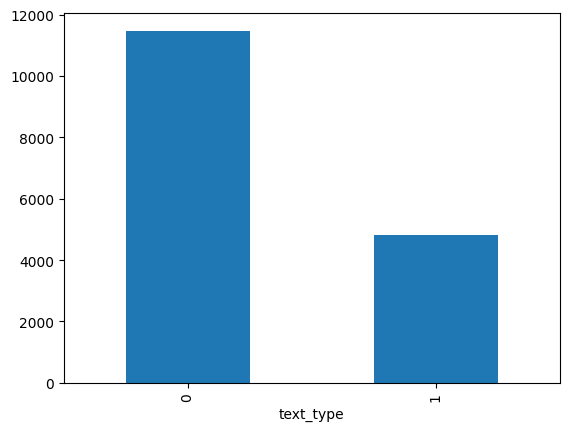

In [27]:
train['text_type'].value_counts().plot(kind='bar');

4809 из 16278 сообщений - спам

### Посмотрим на сообщения из разных категорий

In [127]:
for line in train[train['text_type']==1]['text'].reset_index(drop=True)[np.random.randint(0, 4808, 6)]:
    print(line)
    print()

i never thought i could overcome my financial problems but your guidance without any involvement help me to overcome it thanks sir micheal you can contact him on the link below 👇👇👇

hi guys i am hiring for a data scientist fresher 33 5 lakhs 4k4 5k usd at protonautoml comanybody who is interested look at the details here and submit the test

for over the past few months ive been engaged with forex and binary options trading all thanks to my account manager and best financial aid mr benjamin ive invested and gotten my profits sent to my wallet directly now ive got bitcoins at my disposal you too can be part of this life changing exercise now im sure i wouldnt be needing my regular job no more for im now a vip earner here 👇👇 earnstocksprofits

paid service available now only 💯 rs now come one guys

i just received my money yesterday am so proud of you my problems are all settled thanks

pubg ki id chaiye merko dm karo fast 15 min me chaiye



In [126]:
for line in train[train['text_type']==0]['text'].reset_index(drop=True)[np.random.randint(0, 4808, 6)]:
    print(line)
    print()

oh is it send me the address

from j w ballantine jwb homer att com date wed 1635465 aug 1635465 1635465 1635465 1635465 1635465 i cvs ed the unseen sequences changes and installed them and have only one real issue i use the unseen window rather than the exmh icon and with the new code i can t seem to be able to how many unseen when when i have the main window open is not really necessary hmmm i stole the code from unseenwin but i never tested it since i don t use that functionality consider it on my list of things to check chris chris garrigues url vircio url 1635465 congress suite 1635465 austin tx 1635465 1635465 1635465 1635465 1635465 world war iii the wrong doers vs the evil doers

confirmation of meeting i would very much like to meet vince unfortunately i am in back to back meetings all day today maybe we could rearrange next time vince is in london or i am in houston regards paul to paul e day cc date 29 09 2000 17 52 from shirley crenshaw enron com subject confirmation of mee

### Построим модель на основе TF-IDF и Логистической регрессии

In [39]:
title_transformer = TfidfVectorizer(ngram_range=(1, 5),  
                                    analyzer='char', 
                                    max_features=100000,
                                    stop_words='english')
logit = LogisticRegression( random_state=17,                             
                           solver='lbfgs', 
                           n_jobs=4, 
                           max_iter=500)

model = Pipeline([('tfidf', title_transformer), ('logreg', logit)])

### Подберем параметры с помощью GridSearchCV

In [40]:
grid = {'tfidf__min_df': [0.0001, 0.0005, 0.005],
       'logreg__C':[0.01, 0.1, 1, 3, 10]}

In [41]:
search = GridSearchCV(model, grid, scoring='roc_auc', verbose=3)

In [42]:
search.fit(train['text'], train['text_type'])

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.931 total time=  29.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.938 total time=  29.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.940 total time=  29.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.932 total time=  29.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.944 total time=  29.7s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.935 total time=  29.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.943 total time=  29.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.943 total time=  29.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.935 total time=  29.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.947 total time=  29.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=0.01, tfidf__min_df=0.005;, score=0.942 total time=  27.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=0.01, tfidf__min_df=0.005;, score=0.954 total time=  28.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=0.01, tfidf__min_df=0.005;, score=0.948 total time=  28.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=0.01, tfidf__min_df=0.005;, score=0.943 total time=  28.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=0.01, tfidf__min_df=0.005;, score=0.949 total time=  28.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=0.1, tfidf__min_df=0.0001;, score=0.968 total time=  30.7s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=0.1, tfidf__min_df=0.0001;, score=0.971 total time=  31.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=0.1, tfidf__min_df=0.0001;, score=0.970 total time=  31.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=0.1, tfidf__min_df=0.0001;, score=0.966 total time=  31.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=0.1, tfidf__min_df=0.0001;, score=0.971 total time=  30.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=0.1, tfidf__min_df=0.0005;, score=0.969 total time=  31.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=0.1, tfidf__min_df=0.0005;, score=0.972 total time=  30.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=0.1, tfidf__min_df=0.0005;, score=0.970 total time=  30.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=0.1, tfidf__min_df=0.0005;, score=0.967 total time=  30.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=0.1, tfidf__min_df=0.0005;, score=0.972 total time=  31.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=0.1, tfidf__min_df=0.005;, score=0.969 total time=  29.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=0.1, tfidf__min_df=0.005;, score=0.971 total time=  29.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=0.1, tfidf__min_df=0.005;, score=0.970 total time=  29.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=0.1, tfidf__min_df=0.005;, score=0.966 total time=  29.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=0.1, tfidf__min_df=0.005;, score=0.971 total time=  28.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END .logreg__C=1, tfidf__min_df=0.0001;, score=0.986 total time=  34.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END .logreg__C=1, tfidf__min_df=0.0001;, score=0.984 total time=  34.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END .logreg__C=1, tfidf__min_df=0.0001;, score=0.984 total time=  35.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END .logreg__C=1, tfidf__min_df=0.0001;, score=0.985 total time=  35.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END .logreg__C=1, tfidf__min_df=0.0001;, score=0.986 total time=  35.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END .logreg__C=1, tfidf__min_df=0.0005;, score=0.986 total time=  34.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END .logreg__C=1, tfidf__min_df=0.0005;, score=0.984 total time=  36.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END .logreg__C=1, tfidf__min_df=0.0005;, score=0.984 total time=  34.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END .logreg__C=1, tfidf__min_df=0.0005;, score=0.985 total time=  33.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END .logreg__C=1, tfidf__min_df=0.0005;, score=0.986 total time=  34.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END ..logreg__C=1, tfidf__min_df=0.005;, score=0.984 total time=  31.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END ..logreg__C=1, tfidf__min_df=0.005;, score=0.982 total time=  32.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END ..logreg__C=1, tfidf__min_df=0.005;, score=0.983 total time=  31.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END ..logreg__C=1, tfidf__min_df=0.005;, score=0.984 total time=  31.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END ..logreg__C=1, tfidf__min_df=0.005;, score=0.985 total time=  30.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END .logreg__C=3, tfidf__min_df=0.0001;, score=0.989 total time=  36.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END .logreg__C=3, tfidf__min_df=0.0001;, score=0.987 total time=  35.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END .logreg__C=3, tfidf__min_df=0.0001;, score=0.988 total time=  37.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END .logreg__C=3, tfidf__min_df=0.0001;, score=0.989 total time=  36.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END .logreg__C=3, tfidf__min_df=0.0001;, score=0.990 total time=  36.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END .logreg__C=3, tfidf__min_df=0.0005;, score=0.989 total time=  35.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END .logreg__C=3, tfidf__min_df=0.0005;, score=0.987 total time=  37.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END .logreg__C=3, tfidf__min_df=0.0005;, score=0.987 total time=  38.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END .logreg__C=3, tfidf__min_df=0.0005;, score=0.989 total time=  35.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END .logreg__C=3, tfidf__min_df=0.0005;, score=0.989 total time=  37.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END ..logreg__C=3, tfidf__min_df=0.005;, score=0.987 total time=  32.7s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END ..logreg__C=3, tfidf__min_df=0.005;, score=0.985 total time=  33.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END ..logreg__C=3, tfidf__min_df=0.005;, score=0.986 total time=  32.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END ..logreg__C=3, tfidf__min_df=0.005;, score=0.988 total time=  33.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END ..logreg__C=3, tfidf__min_df=0.005;, score=0.989 total time=  32.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=10, tfidf__min_df=0.0001;, score=0.990 total time=  39.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=10, tfidf__min_df=0.0001;, score=0.988 total time=  42.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=10, tfidf__min_df=0.0001;, score=0.989 total time=  43.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=10, tfidf__min_df=0.0001;, score=0.991 total time=  38.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=10, tfidf__min_df=0.0001;, score=0.991 total time=  39.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END logreg__C=10, tfidf__min_df=0.0005;, score=0.990 total time=  41.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END logreg__C=10, tfidf__min_df=0.0005;, score=0.988 total time=  41.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END logreg__C=10, tfidf__min_df=0.0005;, score=0.989 total time=  40.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END logreg__C=10, tfidf__min_df=0.0005;, score=0.991 total time=  41.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END logreg__C=10, tfidf__min_df=0.0005;, score=0.991 total time=  38.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END .logreg__C=10, tfidf__min_df=0.005;, score=0.988 total time=  34.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END .logreg__C=10, tfidf__min_df=0.005;, score=0.986 total time=  35.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END .logreg__C=10, tfidf__min_df=0.005;, score=0.987 total time=  36.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END .logreg__C=10, tfidf__min_df=0.005;, score=0.989 total time=  35.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END .logreg__C=10, tfidf__min_df=0.005;, score=0.990 total time=  35.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=100000,
                                                        ngram_range=(1, 5),
                                                        stop_words='english')),
                                       ('logreg',
                                        LogisticRegression(max_iter=500,
                                                           n_jobs=4,
                                                           random_state=17))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 3, 10],
                         'tfidf__min_df': [0.0001, 0.0005, 0.005]},
             scoring='roc_auc', verbose=3)

In [43]:
search.best_score_

0.990076078503155

In [44]:
search.best_params_

{'logreg__C': 10, 'tfidf__min_df': 0.0001}

In [45]:
title_transformer = TfidfVectorizer(ngram_range=(1, 5),  
                                    analyzer='char',
                                    min_df = 0.0001,
                                    max_features=100000,
                                    stop_words='english')
logit = LogisticRegression(random_state=17,
                           C = 10,
                           solver='lbfgs', 
                           n_jobs=4, 
                           max_iter=500)

model = Pipeline([('tfidf', title_transformer), ('logreg', logit)])

In [46]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [47]:
%%time
cv_results = cross_val_score(estimator=model, 
                             X=train['text'], 
                             y=train['text_type'],
                             scoring='roc_auc',
                             cv=skf,
                             n_jobs=5)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CPU times: user 489 ms, sys: 148 ms, total: 637 ms
Wall time: 1min 20s


In [48]:
cv_results, cv_results.mean()

(array([0.9911724 , 0.98642577, 0.99192325, 0.98987859, 0.99128551]),
 0.990137101589886)

### TF-IDF + логистическая регрессия дают rocauc 0.99

Параметры: 

TfidfVectorizer(ngram_range=(1, 5), min_df=0.0001, analyzer='char', max_features=100000,stop_words='english')

LogisticRegression(C=10, solver='lbfgs', n_jobs=4, max_iter=500)

In [49]:
model.fit(train['text'], train['text_type'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', max_features=100000,
                                 min_df=0.0001, ngram_range=(1, 5),
                                 stop_words='english')),
                ('logreg',
                 LogisticRegression(C=10, max_iter=500, n_jobs=4,
                                    random_state=17))])

In [50]:
test = pd.read_csv('/kaggle/input/spam-detection-vk/test_spam.csv')

In [51]:
submit = pd.DataFrame({'score' : [], 'text' : []})

In [52]:
submit['text'] = test['text']

In [53]:
submit['score'] = model.predict_proba(submit['text'])

In [54]:
submit.head()

,score,text
0,0.975707,j jim whitehead ejw cse ucsc edu writes j you ...
1,0.985291,original message from bitbitch magnesium net p...
2,0.944355,java for managers vince durasoft who just taug...
3,0.969103,there is a youtuber name saiman says
4,0.276892,underpriced issue with high return on equity t...


In [55]:
submit.to_csv('/kaggle/working/tfidf_logreg_0.99.csv')

### Попробуем изменить analyzer у TF-IDF на word и уменьшим число n-грамм

In [25]:
title_transformer = TfidfVectorizer(ngram_range=(1, 2),  
                                    analyzer='word', 
                                    max_features=100000,
                                    stop_words='english')
logit = LogisticRegression(random_state=17,                             
                           solver='lbfgs', 
                           n_jobs=4, 
                           max_iter=500)

model = Pipeline([('tfidf', title_transformer), ('logreg', logit)])

In [28]:
grid = {'tfidf__min_df': [0.0001, 0.0005, 0.005],
       'logreg__C':[0.01, 0.1, 1, 3, 10]}
search = GridSearchCV(model, grid, scoring='roc_auc', verbose=3)

In [29]:
search.fit(train['text'], train['text_type'])

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.938 total time=   4.7s
[CV 2/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.944 total time=   4.7s
[CV 3/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.945 total time=   4.8s
[CV 4/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.947 total time=   4.7s
[CV 5/5] END logreg__C=0.01, tfidf__min_df=0.0001;, score=0.947 total time=   4.7s
[CV 1/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.939 total time=   4.4s
[CV 2/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.948 total time=   4.4s
[CV 3/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.948 total time=   4.3s
[CV 4/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.949 total time=   4.3s
[CV 5/5] END logreg__C=0.01, tfidf__min_df=0.0005;, score=0.949 total time=   4.3s
[CV 1/5] END logreg__C=0.01, tfidf__min_df=0.005;, score=0.924 total time=   4.3s
[CV 2/5] END logreg__C=0.01

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=100000,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('logreg',
                                        LogisticRegression(max_iter=500,
                                                           n_jobs=4,
                                                           random_state=17))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 3, 10],
                         'tfidf__min_df': [0.0001, 0.0005, 0.005]},
             scoring='roc_auc', verbose=3)

In [32]:
search.best_score_

0.983589814013875

In [33]:
search.best_params_

{'logreg__C': 10, 'tfidf__min_df': 0.0001}

### Если проводить токенизацию по словам, то rocauc получается чуть меньше

### Попробуем TFIDF с подобранными параметрами + случайный лес

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
title_transformer = TfidfVectorizer(ngram_range=(1, 5),  
                                    analyzer='char',
                                    min_df = 0.0001,
                                    max_features=100000,
                                    stop_words='english')
rf = RandomForestClassifier(n_estimators=100)
model = Pipeline([('tfidf', title_transformer), ('rf', rf)])

In [58]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [59]:
%%time
cv_results = cross_val_score(estimator=model, 
                             X=train['text'], 
                             y=train['text_type'],
                             scoring='roc_auc',
                             cv=skf,
                             n_jobs=5)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CPU times: user 728 ms, sys: 385 ms, total: 1.11 s
Wall time: 2min 7s


In [60]:
cv_results, cv_results.mean()

(array([0.98743695, 0.98434994, 0.98767371, 0.98943201, 0.985782  ]),
 0.9869349201033474)

### Без подбора гиперпараметров Случайный лес дает rocauc 0.987. Подберем оптимальные параметры

In [72]:
grid = {'rf__criterion': ["gini", "entropy"], 
        'rf__max_features':[0.001, 4, "sqrt", "log2"]}
search = GridSearchCV(model, grid, scoring='roc_auc', verbose=3, error_score="raise")

In [73]:
%%time
search.fit(train['text'], train['text_type'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=gini, rf__max_features=0.001;, score=0.986 total time=  52.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=gini, rf__max_features=0.001;, score=0.987 total time=  53.8s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=gini, rf__max_features=0.001;, score=0.985 total time=  53.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=gini, rf__max_features=0.001;, score=0.985 total time=  53.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=gini, rf__max_features=0.001;, score=0.988 total time=  55.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=gini, rf__max_features=4;, score=0.980 total time=  46.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=gini, rf__max_features=4;, score=0.982 total time=  46.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=gini, rf__max_features=4;, score=0.982 total time=  45.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=gini, rf__max_features=4;, score=0.982 total time=  44.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=gini, rf__max_features=4;, score=0.984 total time=  45.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=gini, rf__max_features=sqrt;, score=0.985 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=gini, rf__max_features=sqrt;, score=0.987 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=gini, rf__max_features=sqrt;, score=0.985 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=gini, rf__max_features=sqrt;, score=0.986 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=gini, rf__max_features=sqrt;, score=0.988 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=gini, rf__max_features=log2;, score=0.984 total time=  46.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=gini, rf__max_features=log2;, score=0.983 total time=  46.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=gini, rf__max_features=log2;, score=0.982 total time=  45.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=gini, rf__max_features=log2;, score=0.983 total time=  44.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=gini, rf__max_features=log2;, score=0.985 total time=  46.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=entropy, rf__max_features=0.001;, score=0.983 total time=  53.0s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=entropy, rf__max_features=0.001;, score=0.986 total time=  54.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=entropy, rf__max_features=0.001;, score=0.985 total time=  53.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=entropy, rf__max_features=0.001;, score=0.984 total time=  52.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=entropy, rf__max_features=0.001;, score=0.987 total time=  53.9s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=entropy, rf__max_features=4;, score=0.981 total time=  46.2s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=entropy, rf__max_features=4;, score=0.982 total time=  46.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=entropy, rf__max_features=4;, score=0.982 total time=  45.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=entropy, rf__max_features=4;, score=0.984 total time=  43.7s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=entropy, rf__max_features=4;, score=0.986 total time=  46.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=entropy, rf__max_features=sqrt;, score=0.984 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=entropy, rf__max_features=sqrt;, score=0.986 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=entropy, rf__max_features=sqrt;, score=0.985 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=entropy, rf__max_features=sqrt;, score=0.985 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=entropy, rf__max_features=sqrt;, score=0.986 total time= 1.2min


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 1/5] END rf__criterion=entropy, rf__max_features=log2;, score=0.984 total time=  45.1s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 2/5] END rf__criterion=entropy, rf__max_features=log2;, score=0.983 total time=  45.6s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 3/5] END rf__criterion=entropy, rf__max_features=log2;, score=0.983 total time=  45.5s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 4/5] END rf__criterion=entropy, rf__max_features=log2;, score=0.984 total time=  44.3s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


[CV 5/5] END rf__criterion=entropy, rf__max_features=log2;, score=0.984 total time=  45.4s


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CPU times: user 37min 7s, sys: 15.4 s, total: 37min 22s
Wall time: 37min 24s


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=100000,
                                                        min_df=0.0001,
                                                        ngram_range=(1, 5),
                                                        stop_words='english')),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_features': [0.001, 4, 'sqrt', 'log2']},
             scoring='roc_auc', verbose=3)

In [74]:
search.best_score_, search.best_params_

(0.9863108981810225, {'rf__criterion': 'gini', 'rf__max_features': 'sqrt'})

In [7]:
title_transformer = TfidfVectorizer(ngram_range=(1, 5),  
                                    analyzer='char',
                                    min_df = 0.0001,
                                    max_features=100000,
                                    stop_words='english')
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt')
model = Pipeline([('tfidf', title_transformer), ('rf', rf)])

NameError: name 'RandomForestClassifier' is not defined

In [79]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [80]:
%%time
cv_results = cross_val_score(estimator=model, 
                             X=train['text'], 
                             y=train['text_type'],
                             scoring='roc_auc',
                             cv=skf,
                             n_jobs=5)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CPU times: user 756 ms, sys: 554 ms, total: 1.31 s
Wall time: 2min 13s


In [81]:
cv_results, cv_results.mean()

(array([0.98602406, 0.98417752, 0.9869974 , 0.98874547, 0.98628974]),
 0.9864468361675925)

### TF-IDF + Случайный лес с параметрами 'rf__criterion': 'gini', 'rf__max_features': 'sqrt' дает rocauc 0.986, что немного меньше, чем у Логистической регрессии

### Попробуем бустинг

In [82]:
from xgboost import XGBClassifier

In [163]:
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['text_type'], random_state=17)

In [164]:
title_transformer.fit(X_train)
X_train = title_transformer.transform(X_train)
X_test = title_transformer.transform(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [98]:
model = XGBClassifier(n_estimators=500)

In [99]:
%%time
model.fit(X_train, y_train)

CPU times: user 28min 48s, sys: 5.28 s, total: 28min 53s
Wall time: 8min 26s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [101]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc, test_auc

(0.9999999354187731, 0.9893601027949172)

### Градиентный бустинг из коробки дает roc_auc 0.989. Попробуем подобрать лучшие параметры

In [103]:
grid = {
        'learning_rate': [0.1, 0.01, 0.003, 0.001],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.4, 0.7, 1.0],
        'colsample_bytree': [0.2, 0.6, 1.0],
        'max_depth': [3, 5, 7]
        }

In [106]:
model = XGBClassifier(n_estimators=100, nthread=1)

In [109]:
random_search = RandomizedSearchCV(model, grid, n_iter=10, scoring='roc_auc', cv=3, n_jobs=4, verbose=3)

In [112]:
%%time
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=1.0, gamma=0.01, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.4;, score=0.919 total time= 2.7min
[CV 3/3] END colsample_bytree=1.0, gamma=2, learning_rate=0.1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.981 total time= 3.4min
[CV 1/3] END colsample_bytree=1.0, gamma=2, learning_rate=0.01, max_depth=3, min_child_weight=10, subsample=0.4;, score=0.926 total time= 1.5min
[CV 2/3] END colsample_bytree=1.0, gamma=2, learning_rate=0.01, max_depth=3, min_child_weight=10, subsample=0.4;, score=0.917 total time= 1.5min
[CV 3/3] END colsample_bytree=1.0, gamma=2, learning_rate=0.01, max_depth=3, min_child_weight=10, subsample=0.4;, score=0.926 total time= 1.5min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3] END colsample_bytree=1.0, gamma=0.01, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.4;, score=0.908 total time= 2.5min
[CV 2/3] END colsample_bytree=1.0, gamma=2, learning_rate=0.1, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.977 total time= 3.4min
[CV 3/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, subsample=0.7;, score=0.983 total time= 8.8min
[CV 1/3] END colsample_bytree=1.0, gamma=0.01, learning_rate=0.001, max_depth=3, min_child_weight=5, subsample=0.7;, score=0.871 total time= 2.1min
[CV 2/3] END colsample_bytree=1.0, gamma=0.01, learning_rate=0.001, max_depth=5, min_child_weight=10, subsample=0.4;, score=0.908 total time= 2.7min
[CV 1/3] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, subsample=0.7;, score=0.985 total time= 8.7min
[CV 2/3] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=5, subsample=0.4;, score=0.919 

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           nthread=1, num_parallel_tree=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.2, 0.6, 1.0],
                                        'gamma': [0, 0.01, 0.1, 0.5, 2, 5],
                                        'learning_rate': [0.1, 0.01, 0.003,
                                                          0.001],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.4, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [113]:
random_search.best_score_

0.9824862342594609

In [115]:
random_search.best_params_

{'subsample': 0.7,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 1.0}

### Обучим модель с подобранными параметрами с меньшим lr и большим числом деревьев

In [116]:
model = XGBClassifier(subsample=0.7,
                      min_child_weight=1,
                      max_depth=7,
                      learning_rate=0.01,
                      gamma=0,
                      colsample_bytree=1.0,
                      n_estimators=600
                     )

In [117]:
%%time
model.fit(X_train, y_train)

CPU times: user 1h 27min 45s, sys: 16.1 s, total: 1h 28min 1s
Wall time: 27min 41s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [119]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc, test_auc

(0.9953850739610044, 0.983482232644196)

### Градиентный бустинг с TF-IDF не смог перешагнуть 0.99

### Попробуем нейросети + TF-IDF

In [8]:
import torch
import torch.nn as nn

In [9]:
title_transformer = TfidfVectorizer(ngram_range=(1, 5),  
                                    analyzer='char',
                                    min_df = 0.0001,
                                    max_features=100000,
                                    stop_words='english')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['text_type'], random_state=17)

In [11]:
title_transformer.fit(X_train)
X_train_transformed = title_transformer.transform(X_train)
X_test_transformed = title_transformer.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [13]:
X_train_transformed.shape, X_test_transformed.shape

((12208, 100000), (4070, 100000))

Сначала самую простую

In [25]:
model = nn.Sequential(nn.Linear(100000, 7),
                     nn.ReLU(),
                     nn.Linear(7, 1),
                     nn.Sigmoid())

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [16]:
X_train_transformed = torch.tensor(X_train_transformed.toarray(), dtype=torch.float32)
X_test_transformed = torch.tensor(X_test_transformed.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.int)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.int)

In [27]:
criterion = nn.BCELoss()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0)

In [28]:
train_dataset = torch.utils.data.TensorDataset(X_train_transformed, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test_transformed, y_test)


In [23]:
len(train_dataset)

12208

In [32]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)

In [33]:
%%time
for epoch in range(1, 51):
    
    model.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_roc_auc = roc_auc_score(y_train.numpy(), model(X_train_transformed).detach().numpy())
    
    model.eval()
    with torch.no_grad():
        running_loss = 0
        for inputs, labels in test_loader:
            inputs.to(device)
            labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item() * inputs.size(0)
            
        test_loss = running_loss / len(test_loader.dataset)
        test_roc_auc = roc_auc_score(y_test.numpy(), model(X_test_transformed).detach().numpy())
    print('Epoch: {:d} Train loss: {:.3f} Train ROC AUC:{:.3f} Test loss: {:.3f} Test ROC AUC: {:.3f}'.format(epoch, train_loss, train_roc_auc, test_loss, test_roc_auc))
        
        

Epoch: 1 Train loss: 0.376 Train ROC AUC:0.987 Test loss: 0.373 Test ROC AUC: 0.964
Epoch: 2 Train loss: 0.313 Train ROC AUC:0.990 Test loss: 0.325 Test ROC AUC: 0.970
Epoch: 3 Train loss: 0.265 Train ROC AUC:0.992 Test loss: 0.288 Test ROC AUC: 0.974
Epoch: 4 Train loss: 0.228 Train ROC AUC:0.994 Test loss: 0.259 Test ROC AUC: 0.977
Epoch: 5 Train loss: 0.198 Train ROC AUC:0.995 Test loss: 0.237 Test ROC AUC: 0.979
Epoch: 6 Train loss: 0.174 Train ROC AUC:0.996 Test loss: 0.219 Test ROC AUC: 0.981
Epoch: 7 Train loss: 0.155 Train ROC AUC:0.997 Test loss: 0.204 Test ROC AUC: 0.982
Epoch: 8 Train loss: 0.138 Train ROC AUC:0.997 Test loss: 0.191 Test ROC AUC: 0.983
Epoch: 9 Train loss: 0.125 Train ROC AUC:0.998 Test loss: 0.181 Test ROC AUC: 0.984
Epoch: 10 Train loss: 0.113 Train ROC AUC:0.998 Test loss: 0.173 Test ROC AUC: 0.985
Epoch: 11 Train loss: 0.102 Train ROC AUC:0.999 Test loss: 0.165 Test ROC AUC: 0.986
Epoch: 12 Train loss: 0.093 Train ROC AUC:0.999 Test loss: 0.159 Test ROC 

### Простейшая нейронная сеть повторила результат логистической регрессии: rocauc 0.99

Попробуем что-нибудь поглубже

In [35]:
deeper_model = nn.Sequential(nn.Linear(100000, 10),
                     nn.ReLU(),
                     nn.Linear(10, 10),
                     nn.ReLU(),
                     nn.Linear(10, 7),
                     nn.ReLU(),
                     nn.Linear(7, 1),
                     nn.Sigmoid())

In [36]:
criterion = nn.BCELoss()
deeper_model.to(device)
optimizer = torch.optim.Adam(deeper_model.parameters(), lr=0.001, weight_decay=0)

In [37]:
%%time
for epoch in range(1, 71):
    
    deeper_model.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = deeper_model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_roc_auc = roc_auc_score(y_train.numpy(), deeper_model(X_train_transformed).detach().numpy())
    
    deeper_model.eval()
    with torch.no_grad():
        running_loss = 0
        for inputs, labels in test_loader:
            inputs.to(device)
            labels.to(device)
            outputs = deeper_model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item() * inputs.size(0)
            
        test_loss = running_loss / len(test_loader.dataset)
        test_roc_auc = roc_auc_score(y_test.numpy(), deeper_model(X_test_transformed).detach().numpy())
    print('Epoch: {:d} Train loss: {:.3f} Train ROC AUC:{:.3f} Test loss: {:.3f} Test ROC AUC: {:.3f}'.format(epoch, train_loss, train_roc_auc, test_loss, test_roc_auc))
        
        

Epoch: 1 Train loss: 0.637 Train ROC AUC:0.854 Test loss: 0.632 Test ROC AUC: 0.836
Epoch: 2 Train loss: 0.621 Train ROC AUC:0.985 Test loss: 0.607 Test ROC AUC: 0.973
Epoch: 3 Train loss: 0.583 Train ROC AUC:0.991 Test loss: 0.559 Test ROC AUC: 0.981
Epoch: 4 Train loss: 0.510 Train ROC AUC:0.994 Test loss: 0.465 Test ROC AUC: 0.984
Epoch: 5 Train loss: 0.385 Train ROC AUC:0.995 Test loss: 0.335 Test ROC AUC: 0.986
Epoch: 6 Train loss: 0.249 Train ROC AUC:0.997 Test loss: 0.228 Test ROC AUC: 0.987
Epoch: 7 Train loss: 0.152 Train ROC AUC:0.998 Test loss: 0.168 Test ROC AUC: 0.989
Epoch: 8 Train loss: 0.098 Train ROC AUC:0.999 Test loss: 0.137 Test ROC AUC: 0.990
Epoch: 9 Train loss: 0.065 Train ROC AUC:0.999 Test loss: 0.120 Test ROC AUC: 0.990
Epoch: 10 Train loss: 0.045 Train ROC AUC:0.999 Test loss: 0.111 Test ROC AUC: 0.991
Epoch: 11 Train loss: 0.032 Train ROC AUC:1.000 Test loss: 0.107 Test ROC AUC: 0.991
Epoch: 12 Train loss: 0.023 Train ROC AUC:1.000 Test loss: 0.106 Test ROC 

### Более глубокая нейронная сеть также не смогла преодолеть порог 0.99, кроме того начиная с 13 эпохи Test loss начал увеличиваться (но rocauc не падал), что говорит о небольшом переобучении

### Для нейронных сетей можем попробовать TF-IDF с разбиением по словам

In [39]:
word_transformer = TfidfVectorizer(ngram_range=(1, 3),  
                                    analyzer='word',
                                    min_df=0.0001,
                                    max_features=100000,
                                    stop_words='english')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['text_type'], random_state=17)

In [43]:
word_transformer.fit(X_train)
X_train_transformed = word_transformer.transform(X_train)
X_test_transformed = word_transformer.transform(X_test)

In [45]:
X_train_transformed.shape, X_test_transformed.shape

((12208, 96868), (4070, 96868))

In [46]:
X_train_transformed = torch.tensor(X_train_transformed.toarray(), dtype=torch.float32)
X_test_transformed = torch.tensor(X_test_transformed.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.int)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.int)

In [47]:
train_dataset = torch.utils.data.TensorDataset(X_train_transformed, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test_transformed, y_test)

In [48]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)

In [52]:
average_model = nn.Sequential(nn.Linear(96868, 10),
                     nn.ReLU(),
                     nn.Linear(10, 7),
                     nn.ReLU(),
                     nn.Linear(7, 1),
                     nn.Sigmoid())

In [53]:
criterion = nn.BCELoss()
average_model.to(device)
optimizer = torch.optim.Adam(average_model.parameters(), lr=0.001, weight_decay=0)

In [54]:
%%time
for epoch in range(1, 61):
    
    average_model.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = average_model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_roc_auc = roc_auc_score(y_train.numpy(), average_model(X_train_transformed).detach().numpy())
    
    average_model.eval()
    with torch.no_grad():
        running_loss = 0
        for inputs, labels in test_loader:
            inputs.to(device)
            labels.to(device)
            outputs = average_model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item() * inputs.size(0)
            
        test_loss = running_loss / len(test_loader.dataset)
        test_roc_auc = roc_auc_score(y_test.numpy(), average_model(X_test_transformed).detach().numpy())
    print('Epoch: {:d} Train loss: {:.3f} Train ROC AUC:{:.3f} Test loss: {:.3f} Test ROC AUC: {:.3f}'.format(epoch, train_loss, train_roc_auc, test_loss, test_roc_auc))
        
        

Epoch: 1 Train loss: 0.745 Train ROC AUC:0.985 Test loss: 0.738 Test ROC AUC: 0.960
Epoch: 2 Train loss: 0.734 Train ROC AUC:0.994 Test loss: 0.730 Test ROC AUC: 0.977
Epoch: 3 Train loss: 0.725 Train ROC AUC:0.997 Test loss: 0.720 Test ROC AUC: 0.983
Epoch: 4 Train loss: 0.705 Train ROC AUC:0.996 Test loss: 0.685 Test ROC AUC: 0.977
Epoch: 5 Train loss: 0.652 Train ROC AUC:0.994 Test loss: 0.622 Test ROC AUC: 0.970
Epoch: 6 Train loss: 0.571 Train ROC AUC:0.993 Test loss: 0.537 Test ROC AUC: 0.967
Epoch: 7 Train loss: 0.472 Train ROC AUC:0.993 Test loss: 0.446 Test ROC AUC: 0.967
Epoch: 8 Train loss: 0.369 Train ROC AUC:0.995 Test loss: 0.360 Test ROC AUC: 0.970
Epoch: 9 Train loss: 0.279 Train ROC AUC:0.996 Test loss: 0.295 Test ROC AUC: 0.975
Epoch: 10 Train loss: 0.213 Train ROC AUC:0.997 Test loss: 0.251 Test ROC AUC: 0.977
Epoch: 11 Train loss: 0.166 Train ROC AUC:0.998 Test loss: 0.221 Test ROC AUC: 0.979
Epoch: 12 Train loss: 0.133 Train ROC AUC:0.998 Test loss: 0.199 Test ROC 

###  Изменение analyzer на word не помогло. ROC AUC 0.982. Также для трехслойной сети можем заметить аналогичную ситуацию с переобучением

### Попробуем CountVectorizer

In [80]:
count_transformer = CountVectorizer(ngram_range=(1, 3),  
                                    analyzer='word',
                                    min_df=0.0001,
                                    max_features=100000,
                                    stop_words='english')

In [81]:
count_transformer.fit(X_train)
X_train_transformed = count_transformer.transform(X_train)
X_test_transformed = count_transformer.transform(X_test)

In [82]:
X_train_transformed = torch.tensor(X_train_transformed.toarray(), dtype=torch.float32)
X_test_transformed = torch.tensor(X_test_transformed.toarray(), dtype=torch.float32)
#y_train = torch.tensor(y_train.to_numpy(), dtype=torch.int)
#y_test = torch.tensor(y_test.to_numpy(), dtype=torch.int)

In [83]:
X_train_transformed.size(), X_test_transformed.size()

(torch.Size([12208, 96868]), torch.Size([4070, 96868]))

In [84]:
train_dataset = torch.utils.data.TensorDataset(X_train_transformed, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test_transformed, y_test)

In [85]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)

In [86]:
model_for_count = nn.Sequential(nn.Linear(96868, 10),
                                nn.ReLU(),
                                nn.Linear(10, 1),
                                nn.Sigmoid())

In [87]:
criterion = nn.BCELoss()
model_for_count.to(device)
optimizer = torch.optim.Adam(model_for_count.parameters(), lr=0.001, weight_decay=0)

In [88]:
%%time
for epoch in range(1, 61):
    
    model_for_count.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = model_for_count(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_roc_auc = roc_auc_score(y_train.numpy(), model_for_count(X_train_transformed).detach().numpy())
    
    model_for_count.eval()
    with torch.no_grad():
        running_loss = 0
        for inputs, labels in test_loader:
            inputs.to(device)
            labels.to(device)
            outputs = model_for_count(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item() * inputs.size(0)
            
        test_loss = running_loss / len(test_loader.dataset)
        test_roc_auc = roc_auc_score(y_test.numpy(), model_for_count(X_test_transformed).detach().numpy())
    print('Epoch: {:d} Train loss: {:.3f} Train ROC AUC:{:.3f} Test loss: {:.3f} Test ROC AUC: {:.3f}'.format(epoch, train_loss, train_roc_auc, test_loss, test_roc_auc))
        
        

Epoch: 1 Train loss: 0.639 Train ROC AUC:0.955 Test loss: 0.562 Test ROC AUC: 0.916
Epoch: 2 Train loss: 0.496 Train ROC AUC:0.980 Test loss: 0.465 Test ROC AUC: 0.946
Epoch: 3 Train loss: 0.405 Train ROC AUC:0.990 Test loss: 0.400 Test ROC AUC: 0.961
Epoch: 4 Train loss: 0.341 Train ROC AUC:0.994 Test loss: 0.352 Test ROC AUC: 0.970
Epoch: 5 Train loss: 0.293 Train ROC AUC:0.995 Test loss: 0.315 Test ROC AUC: 0.974
Epoch: 6 Train loss: 0.255 Train ROC AUC:0.997 Test loss: 0.286 Test ROC AUC: 0.976
Epoch: 7 Train loss: 0.223 Train ROC AUC:0.998 Test loss: 0.262 Test ROC AUC: 0.977
Epoch: 8 Train loss: 0.197 Train ROC AUC:0.998 Test loss: 0.242 Test ROC AUC: 0.977
Epoch: 9 Train loss: 0.175 Train ROC AUC:0.999 Test loss: 0.226 Test ROC AUC: 0.978
Epoch: 10 Train loss: 0.156 Train ROC AUC:0.999 Test loss: 0.212 Test ROC AUC: 0.978
Epoch: 11 Train loss: 0.140 Train ROC AUC:0.999 Test loss: 0.201 Test ROC AUC: 0.979
Epoch: 12 Train loss: 0.126 Train ROC AUC:0.999 Test loss: 0.191 Test ROC 

In [89]:
deeper_model_for_count = nn.Sequential(nn.Linear(96868, 10),
                                      nn.ReLU(),
                                      nn.Linear(10, 10),
                                      nn.ReLU(),
                                      nn.Linear(10, 7),
                                      nn.ReLU(),
                                      nn.Linear(7, 1),
                                      nn.Sigmoid())

In [90]:
criterion = nn.BCELoss()
deeper_model_for_count.to(device)
optimizer = torch.optim.Adam(deeper_model_for_count.parameters(), lr=0.001, weight_decay=0)

In [91]:
%%time
for epoch in range(1, 61):
    
    deeper_model_for_count.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = deeper_model_for_count(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_roc_auc = roc_auc_score(y_train.numpy(), deeper_model_for_count(X_train_transformed).detach().numpy())
    
    deeper_model_for_count.eval()
    with torch.no_grad():
        running_loss = 0
        for inputs, labels in test_loader:
            inputs.to(device)
            labels.to(device)
            outputs = deeper_model_for_count(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item() * inputs.size(0)
            
        test_loss = running_loss / len(test_loader.dataset)
        test_roc_auc = roc_auc_score(y_test.numpy(), deeper_model_for_count(X_test_transformed).detach().numpy())
    print('Epoch: {:d} Train loss: {:.3f} Train ROC AUC:{:.3f} Test loss: {:.3f} Test ROC AUC: {:.3f}'.format(epoch, train_loss, train_roc_auc, test_loss, test_roc_auc))
        
        

Epoch: 1 Train loss: 0.701 Train ROC AUC:0.979 Test loss: 0.665 Test ROC AUC: 0.950
Epoch: 2 Train loss: 0.613 Train ROC AUC:0.982 Test loss: 0.564 Test ROC AUC: 0.945
Epoch: 3 Train loss: 0.501 Train ROC AUC:0.990 Test loss: 0.465 Test ROC AUC: 0.951
Epoch: 4 Train loss: 0.401 Train ROC AUC:0.995 Test loss: 0.380 Test ROC AUC: 0.968
Epoch: 5 Train loss: 0.302 Train ROC AUC:0.998 Test loss: 0.292 Test ROC AUC: 0.978
Epoch: 6 Train loss: 0.210 Train ROC AUC:0.999 Test loss: 0.224 Test ROC AUC: 0.980
Epoch: 7 Train loss: 0.146 Train ROC AUC:0.999 Test loss: 0.183 Test ROC AUC: 0.981
Epoch: 8 Train loss: 0.104 Train ROC AUC:0.999 Test loss: 0.159 Test ROC AUC: 0.982
Epoch: 9 Train loss: 0.077 Train ROC AUC:1.000 Test loss: 0.146 Test ROC AUC: 0.982
Epoch: 10 Train loss: 0.059 Train ROC AUC:1.000 Test loss: 0.140 Test ROC AUC: 0.982
Epoch: 11 Train loss: 0.046 Train ROC AUC:1.000 Test loss: 0.138 Test ROC AUC: 0.982
Epoch: 12 Train loss: 0.037 Train ROC AUC:1.000 Test loss: 0.139 Test ROC 

KeyboardInterrupt: 

### CountVectorizer с analyzer='word' работает хуже.
Попробуем analyzer='char'

In [94]:
count_transformer_char = CountVectorizer(ngram_range=(1, 5),  
                                    analyzer='char',
                                    min_df=0.0001,
                                    max_features=100000,
                                    stop_words='english')

In [95]:
count_transformer_char.fit(X_train)
X_train_transformed = count_transformer_char.transform(X_train)
X_test_transformed = count_transformer_char.transform(X_test)

X_train_transformed = torch.tensor(X_train_transformed.toarray(), dtype=torch.float32)
X_test_transformed = torch.tensor(X_test_transformed.toarray(), dtype=torch.float32)
#y_train = torch.tensor(y_train.to_numpy(), dtype=torch.int)
#y_test = torch.tensor(y_test.to_numpy(), dtype=torch.int)



(torch.Size([12208, 100000]), torch.Size([4070, 100000]))

In [99]:
X_train_transformed.size(), X_test_transformed.size()

(torch.Size([12208, 100000]), torch.Size([4070, 100000]))

In [96]:
deeper_model_for_count_char = nn.Sequential(nn.Linear(100000, 10),
                                      nn.ReLU(),
                                      nn.Linear(10, 10),
                                      nn.ReLU(),
                                      nn.Linear(10, 7),
                                      nn.ReLU(),
                                      nn.Linear(7, 1),
                                      nn.Sigmoid())

In [97]:
criterion = nn.BCELoss()
deeper_model_for_count_char.to(device)
optimizer = torch.optim.Adam(deeper_model_for_count_char.parameters(), lr=0.001, weight_decay=0)

In [101]:
train_dataset = torch.utils.data.TensorDataset(X_train_transformed, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test_transformed, y_test)

In [102]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)

In [103]:
%%time
for epoch in range(1, 51):
    
    deeper_model_for_count_char.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = deeper_model_for_count_char(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_roc_auc = roc_auc_score(y_train.numpy(), deeper_model_for_count_char(X_train_transformed).detach().numpy())
    
    deeper_model_for_count_char.eval()
    with torch.no_grad():
        running_loss = 0
        for inputs, labels in test_loader:
            inputs.to(device)
            labels.to(device)
            outputs = deeper_model_for_count_char(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            running_loss += loss.item() * inputs.size(0)
            
        test_loss = running_loss / len(test_loader.dataset)
        test_roc_auc = roc_auc_score(y_test.numpy(), deeper_model_for_count_char(X_test_transformed).detach().numpy())
    print('Epoch: {:d} Train loss: {:.3f} Train ROC AUC:{:.3f} Test loss: {:.3f} Test ROC AUC: {:.3f}'.format(epoch, train_loss, train_roc_auc, test_loss, test_roc_auc))
        
   

Epoch: 1 Train loss: 0.634 Train ROC AUC:0.616 Test loss: 0.575 Test ROC AUC: 0.612
Epoch: 2 Train loss: 0.524 Train ROC AUC:0.893 Test loss: 0.482 Test ROC AUC: 0.865
Epoch: 3 Train loss: 0.434 Train ROC AUC:0.964 Test loss: 0.369 Test ROC AUC: 0.936
Epoch: 4 Train loss: 0.250 Train ROC AUC:0.990 Test loss: 0.231 Test ROC AUC: 0.963
Epoch: 5 Train loss: 0.143 Train ROC AUC:0.998 Test loss: 0.173 Test ROC AUC: 0.983
Epoch: 6 Train loss: 0.093 Train ROC AUC:0.999 Test loss: 0.156 Test ROC AUC: 0.983
Epoch: 7 Train loss: 0.067 Train ROC AUC:1.000 Test loss: 0.193 Test ROC AUC: 0.972
Epoch: 8 Train loss: 0.051 Train ROC AUC:1.000 Test loss: 0.264 Test ROC AUC: 0.965
Epoch: 9 Train loss: 0.035 Train ROC AUC:1.000 Test loss: 0.225 Test ROC AUC: 0.973
Epoch: 10 Train loss: 0.024 Train ROC AUC:1.000 Test loss: 0.193 Test ROC AUC: 0.979
Epoch: 11 Train loss: 0.019 Train ROC AUC:1.000 Test loss: 0.225 Test ROC AUC: 0.975
Epoch: 12 Train loss: 0.015 Train ROC AUC:1.000 Test loss: 0.269 Test ROC 

### При использовании CountVectorizer с char анализатором результат все равно меньше 0.99

### Попробуем SVM

In [1]:
from sklearn.svm import SVC

In [13]:
title_transformer = TfidfVectorizer(ngram_range=(1, 5),  
                                    analyzer='char',
                                    min_df = 0.0001,
                                    max_features=100000,
                                    stop_words='english')
svc = SVC(kernel="sigmoid", gamma=1.0)
svc_model = Pipeline([("tfidf", title_transformer), ("svc", svc)])

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [15]:
%%time
cv_results = cross_val_score(estimator=svc_model, 
                             X=train['text'], 
                             y=train['text_type'],
                             scoring='roc_auc',
                             cv=skf,
                             n_jobs=5)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


CPU times: user 1.67 s, sys: 915 ms, total: 2.58 s
Wall time: 8min 7s


In [16]:
cv_results, cv_results.mean()

(array([0.94354159, 0.93610286, 0.9450297 , 0.9423978 , 0.9438615 ]),
 0.9421866910632453)

### SVM не дал лучшего результата

# Итог: лучший скор 0.99 дала логистическая регрессия с TF-IDF. Такой же скор дала двуслойная нейронная сеть, но в сабмишне будет прогноз от логистической регрессии